#Write a Program to Implement the Travelling Salesman Problem using Python.

In [ ]:
ARAD: [0, 235, 256, 248, 277, 158, 180]
TIMISORA: [135, 0, 260, 233, 294, 198, 258]
LUGOJ: [140, 280, 0, 271, 273, 259, 266]
MEHADIA: [200, 298, 283, 0, 263, 218, 220]
DOBRETA: [212, 275, 229, 214, 0, 274, 286]
CAIOVA: [148, 271, 254, 286, 269, 0, 298]
PITESTI: [214, 275, 214, 272, 281, 270, 0]

In [ ]:
Graph_nodes = {
    'ARAD': [('ARAD',0), ('TIMISORA',235), ('LUGOJ',256), ('MEHADIA',248), ('DOBRETA',277), ('CAIOVA',158), ('PITESTI',180)],
    'TIMISORA': [('ARAD',135), ('TIMISORA',0), ('LUGOJ',260), ('MEHADIA',233), ('DOBRETA',294), ('CAIOVA',198), ('PITESTI',258)],
    'LUGOJ': [('ARAD',140), ('TIMISORA',280), ('LUGOJ',0), ('MEHADIA',271), ('DOBRETA',273), ('CAIOVA',259), ('PITESTI',266)],
    'MEHADIA': [('ARAD',200), ('TIMISORA',298), ('LUGOJ',283), ('MEHADIA',0), ('DOBRETA',263), ('CAIOVA',218), ('PITESTI',220)],
'DOBRETA': [('ARAD',212), ('TIMISORA',275), ('LUGOJ',229), ('MEHADIA',214), ('DOBRETA',0), ('CAIOVA',274), ('PITESTI',286)],    'CAIOVA': [('ARAD',148), ('TIMISORA',271), ('LUGOJ',254), ('MEHADIA',286), ('DOBRETA',269), ('CAIOVA',0), ('PITESTI',298)],
    'PITESTI': [('ARAD',214), ('TIMISORA',275), ('LUGOJ',214), ('MEHADIA',272), ('DOBRETA',281), ('CAIOVA',270), ('PITESTI',0)],
}

#Final

DFS Path: ['ARAD', 'CAIOVA', 'LUGOJ', 'PITESTI', 'MEHADIA', 'DOBRETA', 'TIMISORA', 'TIMISORA']
BFS Path: ['ARAD', 'CAIOVA', 'LUGOJ', 'PITESTI', 'MEHADIA', 'DOBRETA', 'TIMISORA', 'ARAD']


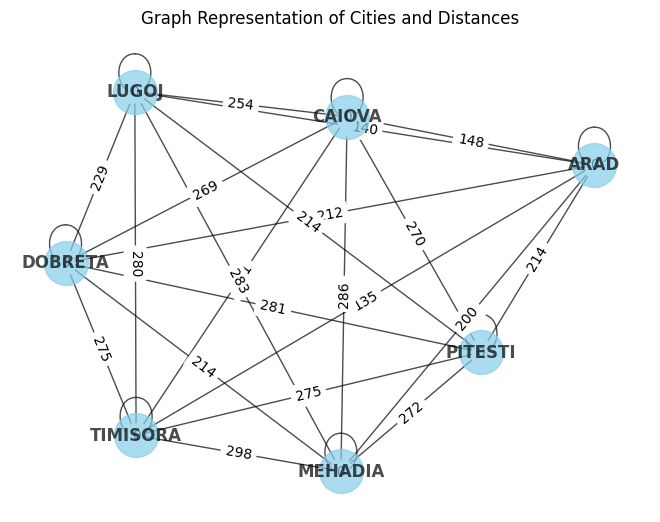

Path cost (DFS): 1488
Path cost (BFS): 1623


In [ ]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

def dfs(graph, start, visited=None, path=None):
    if visited is None:
        visited = set()
    if path is None:
        path = [start]
    visited.add(start)
    if len(visited) == len(graph):
        path.append(start)
        return path
    for neighbor, _ in sorted(graph[start], key=lambda x: x[1]):
        if neighbor not in visited:
            path.append(neighbor)
            new_path = dfs(graph, neighbor, visited.copy(), path)
            if new_path:
                return new_path
            path.pop()

def bfs(graph, start):
    queue = [(start, [start])]
    while queue:
        (node, path) = queue.pop(0)
        for neighbor, _ in sorted(graph[node], key=lambda x: x[1]):
            if neighbor not in path:
                if len(path) == len(graph) - 1:
                    return path + [neighbor, start]
                else:
                    queue.append((neighbor, path + [neighbor]))

def calculate_path_cost(graph, path):
    cost = 0
    for i in range(len(path) - 1):
        current_city = path[i]
        next_city = path[i + 1]
        for neighbor, weight in graph[current_city]:
            if neighbor == next_city:
                cost += weight
                break
    return cost

def visualize_graph(graph):
    G = nx.Graph()

    #Adding nodes
    for node in graph:
        G.add_node(node)

    #adding edges
    for node, edges in graph.items():
        for edge, weight in edges:
            G.add_edge(node, edge, weight=weight)

    #graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue', edge_color='black', width=1, alpha=0.7)

    #Edge labels
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.title("Graph Representation of Cities and Distances")
    plt.show()

if __name__ == "__main__":
    graph_nodes = {
        'ARAD': [('ARAD',0), ('TIMISORA',235), ('LUGOJ',256), ('MEHADIA',248), ('DOBRETA',277), ('CAIOVA',158), ('PITESTI',180)],
        'TIMISORA': [('ARAD',135), ('TIMISORA',0), ('LUGOJ',260), ('MEHADIA',233), ('DOBRETA',294), ('CAIOVA',198), ('PITESTI',258)],
        'LUGOJ': [('ARAD',140), ('TIMISORA',280), ('LUGOJ',0), ('MEHADIA',271), ('DOBRETA',273), ('CAIOVA',259), ('PITESTI',266)],
        'MEHADIA': [('ARAD',200), ('TIMISORA',298), ('LUGOJ',283), ('MEHADIA',0), ('DOBRETA',263), ('CAIOVA',218), ('PITESTI',220)],
        'DOBRETA': [('ARAD',212), ('TIMISORA',275), ('LUGOJ',229), ('MEHADIA',214), ('DOBRETA',0), ('CAIOVA',274), ('PITESTI',286)],
        'CAIOVA': [('ARAD',148), ('TIMISORA',271), ('LUGOJ',254), ('MEHADIA',286), ('DOBRETA',269), ('CAIOVA',0), ('PITESTI',298)],
        'PITESTI': [('ARAD',214), ('TIMISORA',275), ('LUGOJ',214), ('MEHADIA',272), ('DOBRETA',281), ('CAIOVA',270), ('PITESTI',0)],
    }

    start_city = 'ARAD'

    print("DFS Path:", dfs(graph_nodes, start_city))
    print("BFS Path:", bfs(graph_nodes, start_city))

    visualize_graph(graph_nodes)

    path = dfs(graph_nodes, start_city)
    cost = calculate_path_cost(graph_nodes, path)
    print("Path cost (DFS):", cost)

    path = bfs(graph_nodes, start_city)
    cost = calculate_path_cost(graph_nodes, path)
    print("Path cost (BFS):", cost)

DFS Path: ['ARAD', 'DOBRETA', 'MEHADIA', 'CAIOVA', 'TIMISORA', 'PITESTI', 'LUGOJ', 'LUGOJ']
BFS Path: ['ARAD', 'DOBRETA', 'MEHADIA', 'CAIOVA', 'TIMISORA', 'PITESTI', 'LUGOJ', 'ARAD']


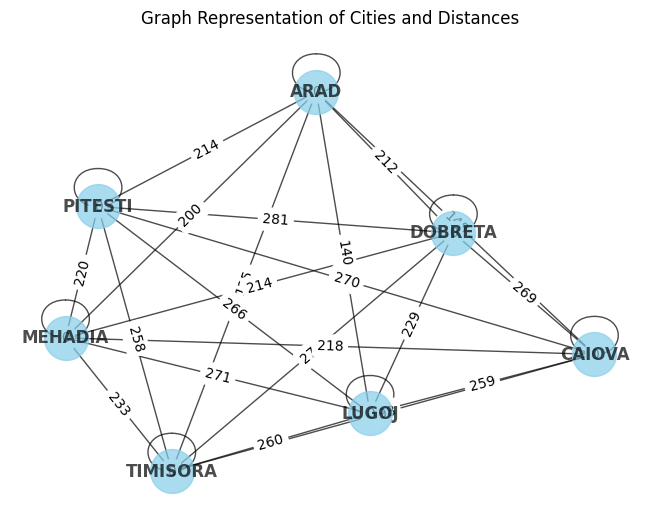

Path cost (DFS): 1154
Path cost (BFS): 1294


In [ ]:
w